<a href="https://colab.research.google.com/github/hmelberg/health-analytics-using-python/blob/dev/1_Appetizers_Some_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Health Analytics in Python using Pandas



Hans Olav Melberg, Nashville, November, 2019


---



---




##Why?

Python and Pandas provide tools that make it easy to do complicated analysis on data that is often messy in a way that is both fast, readable, and reproducable. It also free, it comes with a large and friendly user community that provides answers to all sorts of questions, and it has an extensive collection of pre-made libraries that we can use for everything from visualizations to machine learning. 

All this is true, but the real proof of the pudding is not cheap talk. Let's instead jump right into some examples that demonstrate the power of Python and its tools. These examples are meant as appetizers, and although I show the code, I will not explain all the details. The point is more to demonstrate that it is possible, using very little code, to quickly analyse health data using Python. The details of the code wil be explained in later chapters.

Alse remember: If you are reading this using a notebook, you can run and modify the code by typing CTRL+ENTER when you are in a cell.


#Starting example: Do a few patients represent a large share of the costs?

### Get necessary libraries and data

In [0]:
# Use pandas
import pandas as pd

In [0]:
# Read synthetic medicare sample data on inpatient hospital stays
path = 'https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/'
inpatient_file = 'DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.zip'

df = pd.read_csv(path+inpatient_file)


## First look

In [0]:
# First look
df.head()

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,OT_PHYSN_NPI,CLM_ADMSN_DT,ADMTNG_ICD9_DGNS_CD,CLM_PASS_THRU_PER_DIEM_AMT,NCH_BENE_IP_DDCTBL_AMT,NCH_BENE_PTA_COINSRNC_LBLTY_AM,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,CLM_UTLZTN_DAY_CNT,NCH_BENE_DSCHRG_DT,CLM_DRG_CD,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10,ICD9_PRCDR_CD_1,ICD9_PRCDR_CD_2,ICD9_PRCDR_CD_3,ICD9_PRCDR_CD_4,ICD9_PRCDR_CD_5,ICD9_PRCDR_CD_6,HCPCS_CD_1,HCPCS_CD_2,HCPCS_CD_3,HCPCS_CD_4,...,HCPCS_CD_6,HCPCS_CD_7,HCPCS_CD_8,HCPCS_CD_9,HCPCS_CD_10,HCPCS_CD_11,HCPCS_CD_12,HCPCS_CD_13,HCPCS_CD_14,HCPCS_CD_15,HCPCS_CD_16,HCPCS_CD_17,HCPCS_CD_18,HCPCS_CD_19,HCPCS_CD_20,HCPCS_CD_21,HCPCS_CD_22,HCPCS_CD_23,HCPCS_CD_24,HCPCS_CD_25,HCPCS_CD_26,HCPCS_CD_27,HCPCS_CD_28,HCPCS_CD_29,HCPCS_CD_30,HCPCS_CD_31,HCPCS_CD_32,HCPCS_CD_33,HCPCS_CD_34,HCPCS_CD_35,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00013D2EFD8E45D1,196661176988405,1,20100312.0,20100313.0,2600GD,4000.0,0.0,3.139084e+09,NaN,NaN,20100312,4580,0.0,1100.0,0.0,0.0,1.0,20100313,217,7802,78820,V4501,4280,2720,4019,V4502,73300,E9330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00016F745862898F,196201177000368,1,20090412.0,20090418.0,3900MB,26000.0,0.0,6.476809e+09,NaN,NaN,20090412,7866,0.0,1068.0,0.0,0.0,6.0,20090418,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00016F745862898F,196661177015632,1,20090831.0,20090902.0,3900HM,5000.0,0.0,6.119985e+08,6.119985e+08,NaN,20090831,6186,0.0,1068.0,0.0,0.0,2.0,20090902,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,6186,V5866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00016F745862898F,196091176981058,1,20090917.0,20090920.0,3913XU,5000.0,0.0,4.971603e+09,NaN,1.119000e+09,20090917,29590,0.0,1068.0,0.0,0.0,3.0,20090920,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00016F745862898F,196261176983265,1,20100626.0,20100701.0,3900MB,16000.0,0.0,6.408400e+09,1.960860e+09,NaN,20100626,5849,0.0,1100.0,0.0,0.0,5.0,20100701,983,3569,4019,3542,V8801,78820,2639,7840,7856,4271,NaN,NaN,E8889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# List all column names
df.columns

Index(['DESYNPUF_ID', 'CLM_ID', 'SEGMENT', 'CLM_FROM_DT', 'CLM_THRU_DT',
       'PRVDR_NUM', 'CLM_PMT_AMT', 'NCH_PRMRY_PYR_CLM_PD_AMT', 'AT_PHYSN_NPI',
       'OP_PHYSN_NPI', 'OT_PHYSN_NPI', 'CLM_ADMSN_DT', 'ADMTNG_ICD9_DGNS_CD',
       'CLM_PASS_THRU_PER_DIEM_AMT', 'NCH_BENE_IP_DDCTBL_AMT',
       'NCH_BENE_PTA_COINSRNC_LBLTY_AM', 'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM',
       'CLM_UTLZTN_DAY_CNT', 'NCH_BENE_DSCHRG_DT', 'CLM_DRG_CD',
       'ICD9_DGNS_CD_1', 'ICD9_DGNS_CD_2', 'ICD9_DGNS_CD_3', 'ICD9_DGNS_CD_4',
       'ICD9_DGNS_CD_5', 'ICD9_DGNS_CD_6', 'ICD9_DGNS_CD_7', 'ICD9_DGNS_CD_8',
       'ICD9_DGNS_CD_9', 'ICD9_DGNS_CD_10', 'ICD9_PRCDR_CD_1',
       'ICD9_PRCDR_CD_2', 'ICD9_PRCDR_CD_3', 'ICD9_PRCDR_CD_4',
       'ICD9_PRCDR_CD_5', 'ICD9_PRCDR_CD_6', 'HCPCS_CD_1', 'HCPCS_CD_2',
       'HCPCS_CD_3', 'HCPCS_CD_4', 'HCPCS_CD_5', 'HCPCS_CD_6', 'HCPCS_CD_7',
       'HCPCS_CD_8', 'HCPCS_CD_9', 'HCPCS_CD_10', 'HCPCS_CD_11', 'HCPCS_CD_12',
       'HCPCS_CD_13', 'HCPCS_CD_14', 'HCPCS_CD_15', 

##Explanation of variable names

[Explanations from ResDac, HTML](https://www.resdac.org/cms-data/files/ip-encounter-final/data-documentation)

## Data preparation

In [0]:
# lower case column names
df.columns=df.columns.str.lower()

# easier to use pid than desynpuf_id
df['pid']=df.desynpuf_id

# useful to have pid in index 
df=df.set_index('pid', drop=False)
df.index.name='pid_index'


##Warm up: Mean cost per visit, and mean payment made by the patient herself

In [0]:
df.clm_pmt_amt.mean()

9573.632755754572

Note the structure of the code: We first type the name of the general object (df). We then select a given column, and finally use the method *mean()* on the column. This general structure may be confusing to some since they are used to stating what they want to do first. Here is the difference:
* Functional approach: *mean(age)*  
* Object oriented approach: *age.mean()* 

Python can use both approaches, but working with dataframes and Pandas, the object oriented approach is dominant. Both approaches are fine - there is no reason to get into religious wars here, and each approach has good and bad sides. 

Notice that the object oriented approach lends itself naturally to chaining where you just add methods to the result of the previous objects and methods in the chain, while the functional approach use nested chains that may get very messy:
* Method chaining: ```age.mean().plot()``` 
* Nested functions: ```plot(mean(age))``` 

Pandas - and life? - becomes easier once you understand that it is object oriented - and that this is how you should structure code when trying to torture data when using Pandas.

Ideally it should almost read like a sentence: Take object X, select a subgroup, calculate the mean, make a plot.

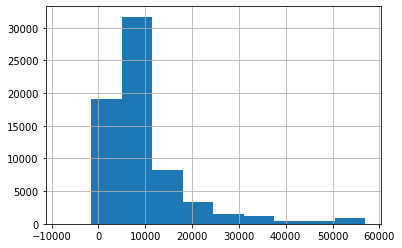

In [0]:
# Histogram showing claims per visit
df.clm_pmt_amt.hist();

In [0]:
# How much of the claim was paid by the patient?

df.nch_bene_ip_ddctbl_amt.mean()


1057.0588435637433

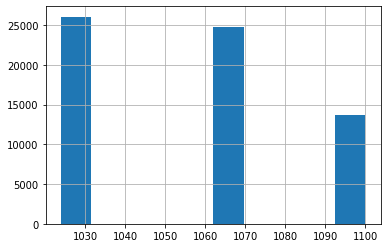

In [0]:
# There seems to be three common deductible amounts
df.nch_bene_ip_ddctbl_amt.hist();

##Example 1: What percentage of patients have 1, 2 .. 10 inpatient visits to the hospital?

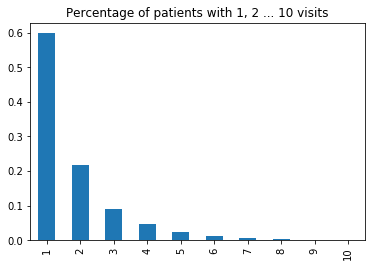

In [0]:
(df.groupby('pid')      #Split the datafram based on pid
          .size()       #Find the size of each of the splitted dataframes = number of events for each person 
          .value_counts(normalize=True) # Count the number of persons with 1, 2, 3 .. visits, and calcualate the percent
          .sort_index() # List result by day 1, 2, 3 ...
          .head(10)    # have a look at the top 10 
          .plot.bar(title='Percentage of patients with 1, 2 ... 10 visits')
);

## Example 2: How many patients with hospital visits in 2009 also had a visit in 2010



In [0]:
# mark all visits from 2010 
# the  date is in the *clm_adms_dt* column and we give visits from 2009 the name visits_2009
# but it is a numeric format and to extract the first four we must first make it a string)
visit_2009 = df.clm_admsn_dt.astype(str).str.startswith('2009')
visit_2010 = df.clm_admsn_dt.astype(str).str.startswith('2010')

Find the unique identification number to all persons in 2009 and 2010.


In [0]:
patient_2009 = set(df[visit_2009].pid.unique())
patient_2010 = set(df[visit_2010].pid.unique())

How many of the persons are in both sets (2009 and 2010)?

In [0]:
both = patient_2009 & patient_2010

len(both)/len(patient_2009)

0.13406605075926517

13% of the patients registered in 2009 also had an inpatient hospital episode in 2010.

## Example 3: Do some costly patients make up a large share of the costs?



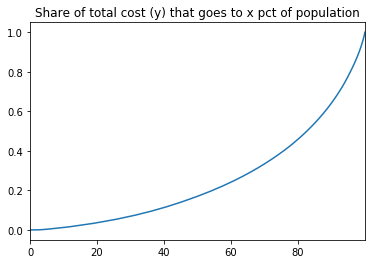

In [0]:
all_payments = df.clm_pmt_amt.sum()

costs = (df.groupby('pid')
              .clm_pmt_amt
              .sum()
              .div(all_payments)
              .sort_values()
              .cumsum()
              .reset_index())

costs.index = (costs.index / len(costs))*100

costs.plot(title = 'Share of total cost (y) that goes to x pct of population',
           legend=None);


Find the percentage of the spending that goes to the 20% most expensive patients.

In [0]:
eighty_pct = int(len(costs)*0.8)

costs.iloc[eighty_pct]


pid            7177889B3B0200AD
clm_pmt_amt            0.458308
Name: 80.0, dtype: object

Conclusion:
* 80% of the patients altogether make up 46% of the costs
* In other words, the 20% most expensive patients, represent 54% of all costs

Exercise
* Topic: Are the expensive patients chronically expensive, or do they just happen to be unlucky in a given year?
* Specific question: What share of the top 20% most expensive that also are in the top 20% in the next year?

0.000000     -0.000005
0.002647     -0.000008
0.005294     -0.000011
0.007941     -0.000014
0.010588     -0.000016
                ...   
99.989412     0.998761
99.992059     0.999057
99.994706     0.999354
99.997353     0.999673
100.000000    1.000000
Name: clm_pmt_amt, Length: 37780, dtype: float64

## Example 4: What are the most common diseases?

In [0]:
df.clm_drg_cd.value_counts(normalize=True)

882    0.004223
177    0.004208
886    0.004118
887    0.004103
181    0.003954
         ...   
769    0.000045
776    0.000045
782    0.000045
927    0.000030
780    0.000030
Name: clm_drg_cd, Length: 739, dtype: float64

In [0]:
drg_codebook = pd.read_csv('https://www.nber.org/drg/drgweight2010.csv')
drg_codebook.head()

,drg,drgnum,drgweight,drgdesc,drgsys,drgvers,glos,trim,low,alos,postacute,specialpay,mdc,medsurg,fydate,fyear,mdcdesc
0,1,1,24.8548,1: HEART TRANSPLANT OR IMPLANT OF HEART ASSIST...,MS-DRG,27,31.5,0,NaN,43.900002,No,No,0.0,SURG,10/1/2009,2010,0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC
1,2,2,11.7540,2: HEART TRANSPLANT OR IMPLANT OF HEART ASSIST...,MS-DRG,27,16.4,0,NaN,21.200001,No,No,0.0,SURG,10/1/2009,2010,0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC
2,3,3,18.2667,"3: ECMO OR TRACH W MV 96+ HRS OR PDX EXC FACE,...",MS-DRG,27,31.6,0,NaN,38.500000,Yes,No,0.0,SURG,10/1/2009,2010,0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC
3,4,4,11.1941,"4: TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH &...",MS-DRG,27,22.9,0,NaN,28.200001,Yes,No,0.0,SURG,10/1/2009,2010,0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC
4,5,5,10.1358,5: LIVER TRANSPLANT W MCC OR INTESTINAL TRANSP...,MS-DRG,27,14.9,0,NaN,20.299999,No,No,0.0,SURG,10/1/2009,2010,0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC


In [0]:
drg2mdg_codebook = pd.read_csv('https://www.nber.org/drg/drg2mdcxw2010.csv')
drg2mdg_codebook.head()

,drg,drgnum,mdc,drgdesc,mdcdesc
0,1,1,0,1: HEART TRANSPLANT OR IMPLANT OF HEART ASSIST...,0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC
1,2,2,0,2: HEART TRANSPLANT OR IMPLANT OF HEART ASSIST...,0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC
2,3,3,0,"3: ECMO OR TRACH W MV 96+ HRS OR PDX EXC FACE,...",0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC
3,4,4,0,"4: TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH &...",0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC
4,5,5,0,5: LIVER TRANSPLANT W MCC OR INTESTINAL TRANSP...,0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC


In [0]:
drg2text = drg_codebook.set_index('drg').drgdesc.to_dict()
drg2mdg = drg2mdg_codebook.set_index('drg').mdcdesc.to_dict()

In [0]:
df.clm_drg_cd.value_counts(normalize=True).rename(index=drg2text)

##Example 5: Typical length of stay 

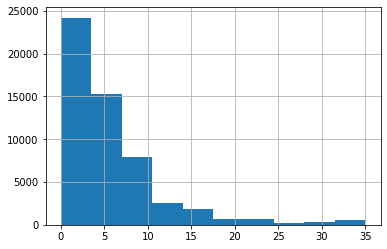

In [0]:
# Convert numeric date column to a proper date format
df['start_date'] = pd.to_datetime(df.clm_from_dt.astype(str).str.strip('.0'), 
                                  format='%Y/%m/%d', 
                                  errors='coerce')
df['end_date'] = pd.to_datetime(df.clm_thru_dt.astype(str).str.strip('.0'), 
                                  format='%Y/%m/%d', 
                                  errors='coerce')
# Obvious!
df['length_of_stay'] = df.end_date - df.start_date

# The difference could be expressed in seconds, minures and many other units
# We tell it to transform the difference to number of days

df['length_of_stay'] = df['length_of_stay'].dt.days

# Draw a plot of the distribution of length of stays
df.length_of_stay.hist();

